## **IMPORT LIBRARY**

In [ ]:
!pip install imbalanced-learn
!pip install tensorflow
!pip install scikit-learn
!pip show tensorflow

Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as Xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.base import BaseEstimator, ClassifierMixin

# ***IMPORT DATASET***

In [ ]:
Dataset_2=pd.read_csv('/content/Dataset_2.csv')

In [ ]:
Dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917 entries, 0 to 7916
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            7832 non-null   float64
 1   gender         7840 non-null   object 
 2   job_role       6600 non-null   object 
 3   province       7831 non-null   object 
 4   salary         7843 non-null   float64
 5   is_married     7845 non-null   float64
 6   is_hereditary  7828 non-null   float64
 7   weight         7861 non-null   float64
 8   height         7843 non-null   float64
 9   shampoo        7858 non-null   object 
 10  is_smoker      7847 non-null   float64
 11  education      7847 non-null   object 
 12  stress         7853 non-null   float64
 13  bald_prob      7838 non-null   float64
dtypes: float64(9), object(5)
memory usage: 866.0+ KB


# **DATASET INFORMATION**

In [ ]:
Dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917 entries, 0 to 7916
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            7832 non-null   float64
 1   gender         7840 non-null   object 
 2   job_role       6600 non-null   object 
 3   province       7831 non-null   object 
 4   salary         7843 non-null   float64
 5   is_married     7845 non-null   float64
 6   is_hereditary  7828 non-null   float64
 7   weight         7861 non-null   float64
 8   height         7843 non-null   float64
 9   shampoo        7858 non-null   object 
 10  is_smoker      7847 non-null   float64
 11  education      7847 non-null   object 
 12  stress         7853 non-null   float64
 13  bald_prob      7838 non-null   float64
dtypes: float64(9), object(5)
memory usage: 866.0+ KB


In [ ]:
Dataset_2.shape

(7917, 14)

In [ ]:
Dataset_2.isnull().sum()

,0
age,85
gender,77
job_role,1317
province,86
salary,74
is_married,72
is_hereditary,89
weight,56
height,74
shampoo,59


# **DATA TYPE**

In [ ]:
data_types = Dataset_2.dtypes
num_categorical = sum(data_types == 'object')
num_quantitative = sum(data_types != 'object')

print("Number of categorical features:", num_categorical)
print("Number of quantitative features:", num_quantitative)

Number of categorical features: 5
Number of quantitative features: 9


# **Correlation Matrix**

                    age    gender  job_role  province   salary   is_married  \
age            1.000000  0.032686  0.214509  0.121124 -0.108858   -0.009997   
gender         0.032686  1.000000  0.100482 -0.012665 -0.053001   -0.142897   
job_role       0.214509  0.100482  1.000000 -0.180877  0.207838   -0.116358   
province       0.121124 -0.012665 -0.180877  1.000000  0.005201    0.097619   
salary        -0.108858 -0.053001  0.207838  0.005201  1.000000    0.080053   
is_married    -0.009997 -0.142897 -0.116358  0.097619  0.080053    1.000000   
is_hereditary  0.008618  0.182740  0.014822 -0.080383  0.104858   -0.069996   
weight        -0.081815  0.014313 -0.104739  0.210915  0.171374    0.253422   
height         0.084865  0.095743  0.052916  0.176365  0.121842   -0.115440   
is_smoker      0.001597 -0.071581 -0.118676  0.034843 -0.059570    0.223948   
shampoo       -0.129235 -0.157358 -0.115973  0.130858 -0.121734   -0.118358   
education      0.010246  0.127945 -0.053936  0.05092

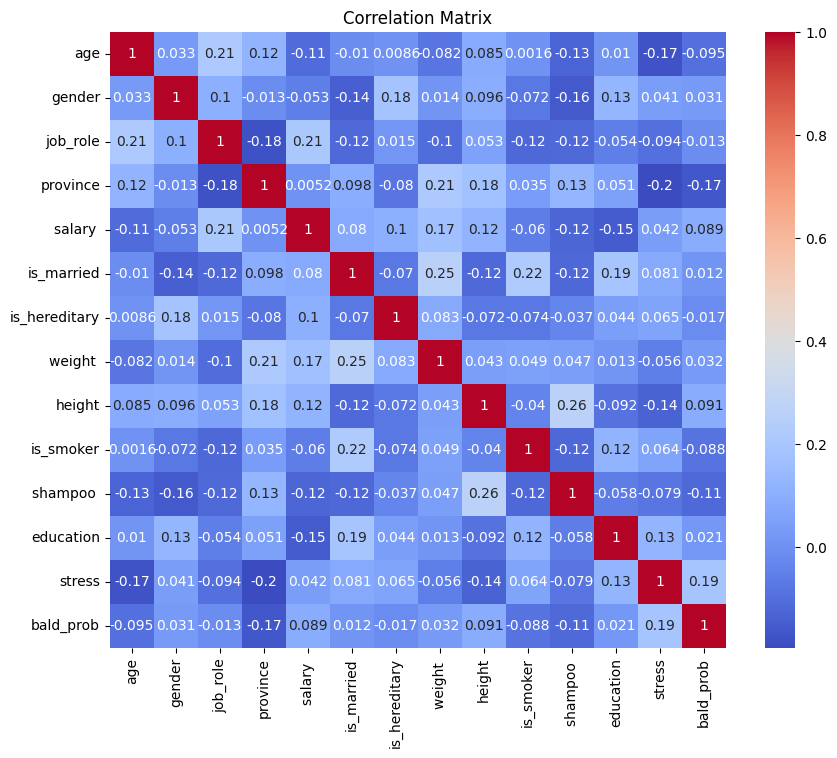

In [ ]:
np.random.seed(0)
data = np.random.rand(100, 14)
df = pd.DataFrame(data, columns=['age', 'gender', 'job_role', 'province', 'salary ','is_married','is_hereditary','weight ','height','is_smoker','shampoo ','education','stress','bald_prob'])

# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
Dataset_2.tail()

,age,gender,job_role,province,salary,is_married,is_hereditary,weight,height,shampoo,is_smoker,education,stress,bald_prob
7912,32.0,male,Employee,Yogyakarta,6.024409e+06,1.0,0.0,44.432438,154.578859,Deadbuoy,0.0,Senior High School,9.0,0.471229
7913,34.0,male,Employee,Manado,1.007043e+07,1.0,0.0,49.389914,158.782726,Shoulder & Head,1.0,Bachelor Degree,9.0,0.543821
7914,58.0,male,NaN,Mamuju,8.010815e+06,1.0,0.0,54.351968,154.478087,Deadbuoy,1.0,Magister Degree,6.0,0.643453
7915,30.0,NaN,Government Employee,Palu,9.059906e+06,1.0,0.0,57.646930,163.377717,Deadbuoy,0.0,Bachelor Degree,10.0,0.540056
7916,58.0,male,Government Employee,Banjarmasin,1.769162e+07,1.0,0.0,81.036287,183.054150,Shoulder & Head,1.0,Bachelor Degree,10.0,0.872124


# **Inputing**

In [ ]:
Dataset_2['age'].fillna(Dataset_2['age'].mean(),inplace=True)

<ipython-input-68-53d2f79cbbbf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset_2['age'].fillna(Dataset_2['age'].mean(),inplace=True)


In [ ]:
Dataset_2.isnull().sum()

,0
age,0
gender,77
job_role,1317
province,86
salary,74
is_married,72
is_hereditary,89
weight,56
height,74
shampoo,59


In [ ]:
Dataset_2["gender"].mode()
Dataset_2["gender"].fillna(Dataset_2["gender"].mode()[0],inplace=True)

<ipython-input-70-76d56076479f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset_2["gender"].fillna(Dataset_2["gender"].mode()[0],inplace=True)


In [ ]:
Dataset_2.isnull().sum()

,0
age,0
gender,0
job_role,1317
province,86
salary,74
is_married,72
is_hereditary,89
weight,56
height,74
shampoo,59


In [ ]:
Dataset_2['salary'].fillna(Dataset_2['salary'].mean(),inplace=True)

<ipython-input-72-5d992b0a4eff>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset_2['salary'].fillna(Dataset_2['salary'].mean(),inplace=True)


In [ ]:
Dataset_2['is_married'].fillna(Dataset_2['is_married'].mean(),inplace=True)

<ipython-input-73-69bd75fd65f2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset_2['is_married'].fillna(Dataset_2['is_married'].mean(),inplace=True)


In [ ]:
Dataset_2['weight'].fillna(Dataset_2['weight'].mean(),inplace=True)
Dataset_2['height'].fillna(Dataset_2['height'].mean(),inplace=True)

<ipython-input-74-555dd956e584>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset_2['weight'].fillna(Dataset_2['weight'].mean(),inplace=True)
<ipython-input-74-555dd956e584>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [ ]:
Dataset_2["education"].mode()
Dataset_2["education"].fillna(Dataset_2["education"].mode()[0],inplace=True)

<ipython-input-75-4108337ec033>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset_2["education"].fillna(Dataset_2["education"].mode()[0],inplace=True)


In [ ]:
Dataset_2['stress'].fillna(Dataset_2['stress'].mean(),inplace=True)
Dataset_2['bald_prob'].fillna(Dataset_2['bald_prob'].mean(),inplace=True)

<ipython-input-76-c9afcf6ee226>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset_2['stress'].fillna(Dataset_2['stress'].mean(),inplace=True)
<ipython-input-76-c9afcf6ee226>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [ ]:
Dataset_2.isnull().sum()

,0
age,0
gender,0
job_role,1317
province,86
salary,0
is_married,0
is_hereditary,89
weight,0
height,0
shampoo,59


## drop coloumn**

shampoo: Correlation with bald_prob is low (-0.113), and it doesn't seem to provide useful information. job_role: Very weak correlation with bald_prob (-0.013), so it might not be very useful. is_hereditary: Minimal correlation (-0.017) with the target feature. is_smoker: Correlation with bald_prob is quite low (-0.088). These columns could be dropped as they have little or no significant impact on predicting bald_prob.

In [ ]:

Dataset_2.drop(columns='job_role', axis=1, inplace=True)
Dataset_2.drop(columns='is_hereditary', axis=1, inplace=True)
Dataset_2.drop(columns='is_smoker', axis=1, inplace=True)

In [ ]:
Dataset_2.drop(columns='province', axis=1, inplace=True)
#Dataset_2.drop(columns='salary', axis=1, inplace=True)

In [ ]:
Dataset_2.head()

,age,gender,salary,is_married,weight,height,shampoo,education,stress,bald_prob
0,27.0,female,7.957453e+06,1.0,54.315053,170.428542,Pantone,Bachelor Degree,5.0,0.605974
1,53.0,female,7.633003e+06,1.0,72.873404,165.530097,Pantone,Bachelor Degree,7.0,0.532860
2,37.0,female,6.637625e+06,1.0,46.321533,154.599388,Moonsilk,Bachelor Degree,4.0,0.418442
3,36.0,female,3.624871e+06,1.0,51.539781,167.340481,Deadbuoy,Elementary School,9.0,0.804050
4,38.0,male,6.031808e+06,1.0,60.726909,165.514773,Merpati,Magister Degree,1.0,0.368371


# ***ENCODING***

In [ ]:
Dataset_2['education'].value_counts()

,count
education,
Bachelor Degree,4379
Senior High School,1986
Magister Degree,607
Junior High School,560
Elementary School,225
Doctoral Degree,160


In [ ]:
Dataset_2.replace({"gender":{"male":0,"female":1},"education":{"Bachelor Degree":0,"Elementary School":1,"Magister Degree":2,"Senior High School":3,"Junior High School":4,"Doctoral Degree":5},},inplace=True)

<ipython-input-82-e8ec252e4895>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Dataset_2.replace({"gender":{"male":0,"female":1},"education":{"Bachelor Degree":0,"Elementary School":1,"Magister Degree":2,"Senior High School":3,"Junior High School":4,"Doctoral Degree":5},},inplace=True)


In [ ]:
Dataset_2.tail()

,age,gender,salary,is_married,weight,height,shampoo,education,stress,bald_prob
7912,32.0,0,6.024409e+06,1.0,44.432438,154.578859,Deadbuoy,3,9.0,0.471229
7913,34.0,0,1.007043e+07,1.0,49.389914,158.782726,Shoulder & Head,0,9.0,0.543821
7914,58.0,0,8.010815e+06,1.0,54.351968,154.478087,Deadbuoy,2,6.0,0.643453
7915,30.0,0,9.059906e+06,1.0,57.646930,163.377717,Deadbuoy,0,10.0,0.540056
7916,58.0,0,1.769162e+07,1.0,81.036287,183.054150,Shoulder & Head,0,10.0,0.872124


In [ ]:

# Step 2: Extract the target column into a NumPy array
# Replace 'your_target_column' with the actual name of your target column
y_continuous = Dataset_2['bald_prob'].to_numpy()
threshold = 0.5  # You can adjust this threshold based on your data

# Step 4: Binarize the target based on the chosen threshold
Y_final = np.where(y_continuous > threshold, 1, 0)
print("Binary labels based on the specific threshold of 0.5:",Y_final[:7917])

Binary labels based on the specific threshold of 0.5: [1 1 0 ... 1 1 1]


# **data splitting**

In [ ]:
X = Dataset_2[["age", "gender","salary","is_married","weight","height","education","stress"]]
Dataset_2["bald_prob"] = Y_final
Y = Dataset_2["bald_prob"]

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
print(X)

       age  gender        salary  is_married     weight      height  \
0     27.0       1  7.957453e+06         1.0  54.315053  170.428542   
1     53.0       1  7.633003e+06         1.0  72.873404  165.530097   
2     37.0       1  6.637625e+06         1.0  46.321533  154.599388   
3     36.0       1  3.624871e+06         1.0  51.539781  167.340481   
4     38.0       0  6.031808e+06         1.0  60.726909  165.514773   
...    ...     ...           ...         ...        ...         ...   
7912  32.0       0  6.024409e+06         1.0  44.432438  154.578859   
7913  34.0       0  1.007043e+07         1.0  49.389914  158.782726   
7914  58.0       0  8.010815e+06         1.0  54.351968  154.478087   
7915  30.0       0  9.059906e+06         1.0  57.646930  163.377717   
7916  58.0       0  1.769162e+07         1.0  81.036287  183.054150   

      education  stress  
0             0     5.0  
1             0     7.0  
2             0     4.0  
3             1     9.0  
4             2  

In [ ]:
print(Y)

0       1
1       1
2       0
3       1
4       0
       ..
7912    0
7913    1
7914    1
7915    1
7916    1
Name: bald_prob, Length: 7917, dtype: int64


In [ ]:
print(Y_final)

[1 1 0 ... 1 1 1]


In [ ]:
Dataset_2.head()

,age,gender,salary,is_married,weight,height,shampoo,education,stress,bald_prob
0,27.0,1,7.957453e+06,1.0,54.315053,170.428542,Pantone,0,5.0,1
1,53.0,1,7.633003e+06,1.0,72.873404,165.530097,Pantone,0,7.0,1
2,37.0,1,6.637625e+06,1.0,46.321533,154.599388,Moonsilk,0,4.0,0
3,36.0,1,3.624871e+06,1.0,51.539781,167.340481,Deadbuoy,1,9.0,1
4,38.0,0,6.031808e+06,1.0,60.726909,165.514773,Merpati,2,1.0,0


# **Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
Dataset_2.describe()

,age,gender,salary,is_married,weight,height,education,stress,bald_prob
count,7917.000000,7917.000000,7.917000e+03,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000
mean,39.492722,0.312366,8.853770e+06,0.979095,55.957306,167.252704,1.318302,5.456259,0.654667
std,9.829584,0.463487,4.478762e+06,0.142423,9.560069,10.882421,1.578655,2.849036,0.475507
min,2.000000,0.000000,1.500000e+06,0.000000,40.000000,125.491784,0.000000,1.000000,0.000000
25%,33.000000,0.000000,5.756171e+06,1.000000,49.357747,159.815742,0.000000,3.000000,0.000000
50%,39.492722,0.000000,7.899815e+06,1.000000,53.914947,167.252704,0.000000,5.000000,1.000000
75%,46.000000,1.000000,1.079720e+07,1.000000,60.221232,174.357708,3.000000,8.000000,1.000000
max,77.000000,1.000000,5.000000e+07,1.000000,150.000000,226.454577,5.000000,10.000000,1.000000


# **Model Training**

# **KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, Y_train)

KNeighborsClassifier()

In [ ]:
X_train_prediction_knn=knn.predict(X_train_scaled)
train_accuracy_knn=accuracy_score(Y_train,X_train_prediction_knn)
print("Training data accuracy of knn: ",train_accuracy_knn)

Training data accuracy of knn:  0.7911929254647175


In [ ]:
X_test_prediction_knn=knn.predict(X_test_scaled)
test_accuracy_knn=accuracy_score(Y_test,X_test_prediction_knn)
print("Testing data accuracy of knn: ",test_accuracy_knn)

Testing data accuracy of knn:  0.6906565656565656


# **Logistic** **regression**

In [ ]:
log_reg=LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled,Y_train)

LogisticRegression(max_iter=500)

In [ ]:
X_train_prediction_log_reg=log_reg.predict(X_train_scaled)
train_accuracy_log_reg=accuracy_score(Y_train,X_train_prediction_log_reg)
print("Training data accuracy of logreg: ",train_accuracy_log_reg)

Training data accuracy of logreg:  0.7166576430247248


In [ ]:
X_test_prediction_log_reg=log_reg.predict(X_test_scaled)
test_accuracy_log_reg=accuracy_score(Y_test,X_test_prediction_log_reg)
print("Testing data accuracy of logreg: ",test_accuracy_log_reg)

Testing data accuracy of logreg:  0.7268518518518519


# **Gaussian Naive Bayes**

In [ ]:
nbayes = GaussianNB()
nbayes.fit(X_train_scaled,Y_train)

GaussianNB()

In [ ]:
X_train_prediction_nbayes=nbayes.predict(X_train_scaled)
train_accuracy_nbayes=accuracy_score(Y_train,X_train_prediction_nbayes)
print("Training data accuracy of nbayes: ",train_accuracy_nbayes)

Training data accuracy of nbayes:  0.7005955603681646


In [ ]:
X_test_prediction_nbayes=nbayes.predict(X_test_scaled)
test_accuracy_nbayes=accuracy_score(Y_test,X_test_prediction_nbayes)
print("Testing data accuracy of nbayes: ",test_accuracy_nbayes)

Testing data accuracy of nbayes:  0.7032828282828283


# **Decision Tree Classifier**

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, Y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
X_train_prediction_dt_classifier=dt_classifier.predict(X_train_scaled)
train_accuracy_dt_classifier=accuracy_score(Y_train,X_train_prediction_dt_classifier)
print("Training data accuracy of dt_classifier: ",train_accuracy_dt_classifier)

Training data accuracy of dt_classifier:  1.0


In [ ]:
X_test_prediction_dt_classifier=dt_classifier.predict(X_test_scaled)
test_accuracy_dt_classifier=accuracy_score(Y_test,X_test_prediction_dt_classifier)
print("Testing data accuracy of dt_classifier: ",test_accuracy_dt_classifier)

Testing data accuracy of dt_classifier:  0.6675084175084175


# **Random Forest**

In [ ]:
random_forest = RandomForestClassifier(n_estimators=300)
random_forest.fit(X_train_scaled, Y_train)
X_train_prediction_random_forest=random_forest.predict(X_train_scaled)
train_accuracy_random_forest=accuracy_score(Y_train,X_train_prediction_random_forest)
print("Training data accuracy of random_forest: ",train_accuracy_random_forest)


Training data accuracy of random_forest:  1.0


In [ ]:
X_test_prediction_random_forest=random_forest.predict(X_test_scaled)
test_accuracy_random_forest=accuracy_score(Y_test,X_test_prediction_random_forest)
print("Testing data accuracy of random_forest: ",test_accuracy_random_forest)

Testing data accuracy of random_forest:  0.7314814814814815


# **XGBClassifier**

In [ ]:
xgb = Xgb.XGBClassifier()
xgb.fit(X_train_scaled, Y_train)
X_train_prediction_xgb=xgb.predict(X_train_scaled)
train_accuracy_xgb=accuracy_score(Y_train,X_train_prediction_xgb)
print("Training data accuracy of xgb: ",train_accuracy_xgb)

Training data accuracy of xgb:  0.944775311315647


In [ ]:
X_test_prediction_xgb=xgb.predict(X_test_scaled)
test_accuracy_xgb=accuracy_score(Y_test,X_test_prediction_xgb)
print("Testing data accuracy of xgb: ",test_accuracy_xgb)

Testing data accuracy of xgb:  0.7171717171717171


# **SVM**

In [ ]:
svc = SVC()
svc.fit(X_train_scaled, Y_train)
X_train_prediction_svc=svc.predict(X_train_scaled)
train_accuracy_svc=accuracy_score(Y_train,X_train_prediction_svc)
print("Training data accuracy of xgb: ",train_accuracy_svc)

Training data accuracy of xgb:  0.7354268182638513


In [ ]:
X_test_prediction_svc=svc.predict(X_test_scaled)
test_accuracy_svc=accuracy_score(Y_test,X_test_prediction_svc)
print("Testing data accuracy of svc: ",test_accuracy_svc)

Testing data accuracy of svc:  0.7272727272727273


# **Models Score**

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Naive Bayes', "KNN","DT_classifier","Random_Forest","XGBClassifier","SVC","Meta Classifier"],
    'Score': [test_accuracy_log_reg,test_accuracy_nbayes,test_accuracy_knn,test_accuracy_dt_classifier,test_accuracy_random_forest,test_accuracy_xgb,test_accuracy_svc,accuracy_meta]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Meta Classifier,0.753367
4,Random_Forest,0.731481
6,SVC,0.727273
0,Logistic Regression,0.726852
5,XGBClassifier,0.717172
1,Naive Bayes,0.703283
2,KNN,0.690657
3,DT_classifier,0.667508


In [ ]:
predictions_xgb = xgb.predict(X_test_scaled)
predictions_svc = X_test_prediction_svc=svc.predict(X_test_scaled)
predictions_log_reg = log_reg.predict(X_test_scaled)
predictions_rf = random_forest.predict(X_test_scaled)
predictions_knn = knn.predict(X_test_scaled)
predictions_nb = nbayes.predict(X_test_scaled)
predictions_dt = dt_classifier.predict(X_test_scaled)

# Combine predictions into a new DataFrame
predictions_df = pd.DataFrame({
    'xgb': predictions_xgb,
    'svc': predictions_svc,
    'log_reg': predictions_log_reg,
    'rf': predictions_rf,
    'knn': predictions_knn,
    'nb': predictions_nb,
    'dt': predictions_dt
})

# Step 2: Prepare the target variable
target = Y_test  # Use the actual target variable for the test set

# Step 3: Train a meta-classifier
meta_classifier = RandomForestClassifier()  # You can choose any classifier as the meta-classifier
meta_classifier.fit(predictions_df, target)

# Step 4: Make predictions with the meta-classifier
y_pred_meta = meta_classifier.predict(predictions_df)

# Step 5: Evaluate the performance of the meta-classifier
accuracy_meta = accuracy_score(target, y_pred_meta)
print("Accuracy of Meta Classifier:", accuracy_meta)

Accuracy of Meta Classifier: 0.7533670033670034


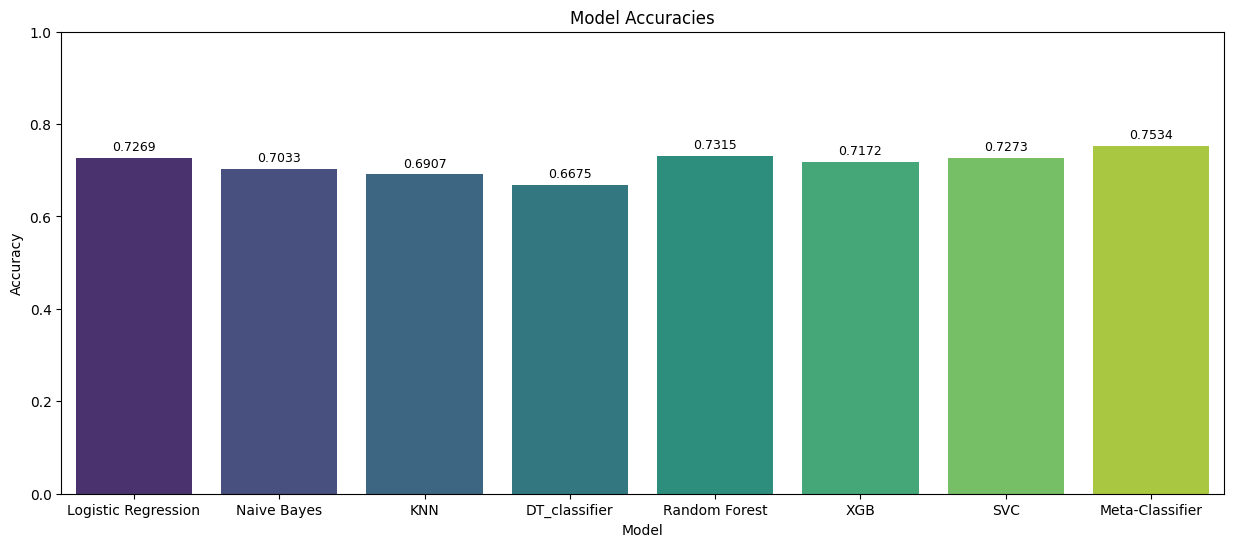

In [ ]:
models = ["Logistic Regression", "Naive Bayes","KNN","DT_classifier","Random Forest","XGB","SVC","Meta-Classifier"]
accuracies = [test_accuracy_log_reg, test_accuracy_nbayes,test_accuracy_knn,test_accuracy_dt_classifier,test_accuracy_random_forest,test_accuracy_xgb,test_accuracy_svc,accuracy_meta]

# Create a bar plot using Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x=models, y=accuracies, hue=models, palette="viridis", legend=False)
plt.title("Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy

# Display numeric values on the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f"{accuracy:.4f}", ha="center", va="bottom", fontsize=9)

plt.show()

In [ ]:
# Calculate F1-score for each model
f1_scores = [f1_score(Y_test, X_test_prediction_log_reg),
             f1_score(Y_test, X_test_prediction_nbayes),
             f1_score(Y_test, X_test_prediction_knn),
             f1_score(Y_test, X_test_prediction_dt_classifier),
             f1_score(Y_test, X_test_prediction_random_forest),
             f1_score(Y_test,X_test_prediction_xgb),
             f1_score(Y_test,X_test_prediction_svc),
             f1_score(Y_test,y_pred_meta),]


# Print F1-scores for each model
for model, f1_score_value in zip(models, f1_scores):
    print(f"{model}: F1-score = {f1_score_value:.4f}")

Logistic Regression: F1-score = 0.8063
Naive Bayes: F1-score = 0.8095
KNN: F1-score = 0.7700
DT_classifier: F1-score = 0.7478
Random Forest: F1-score = 0.8032
XGB: F1-score = 0.7923
SVC: F1-score = 0.8104
Meta-Classifier: F1-score = 0.8261


<ipython-input-117-507a7e2fc1f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=f1_scores, palette="viridis",legend=False)


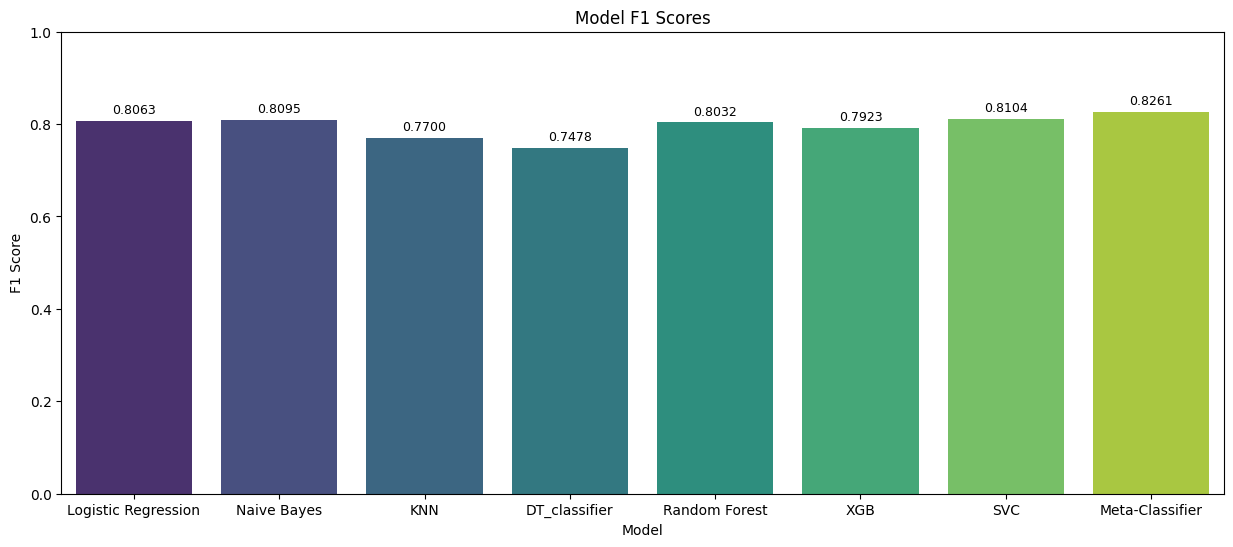

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x=models, y=f1_scores, palette="viridis",legend=False)
plt.title("Model F1 Scores")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for F1 score

# Display numeric values on the bars for F1 scores
for i, f1 in enumerate(f1_scores):
    plt.text(i, f1 + 0.01, f"{f1:.4f}", ha="center", va="bottom", fontsize=9)

plt.show()

# **Precision Recall**

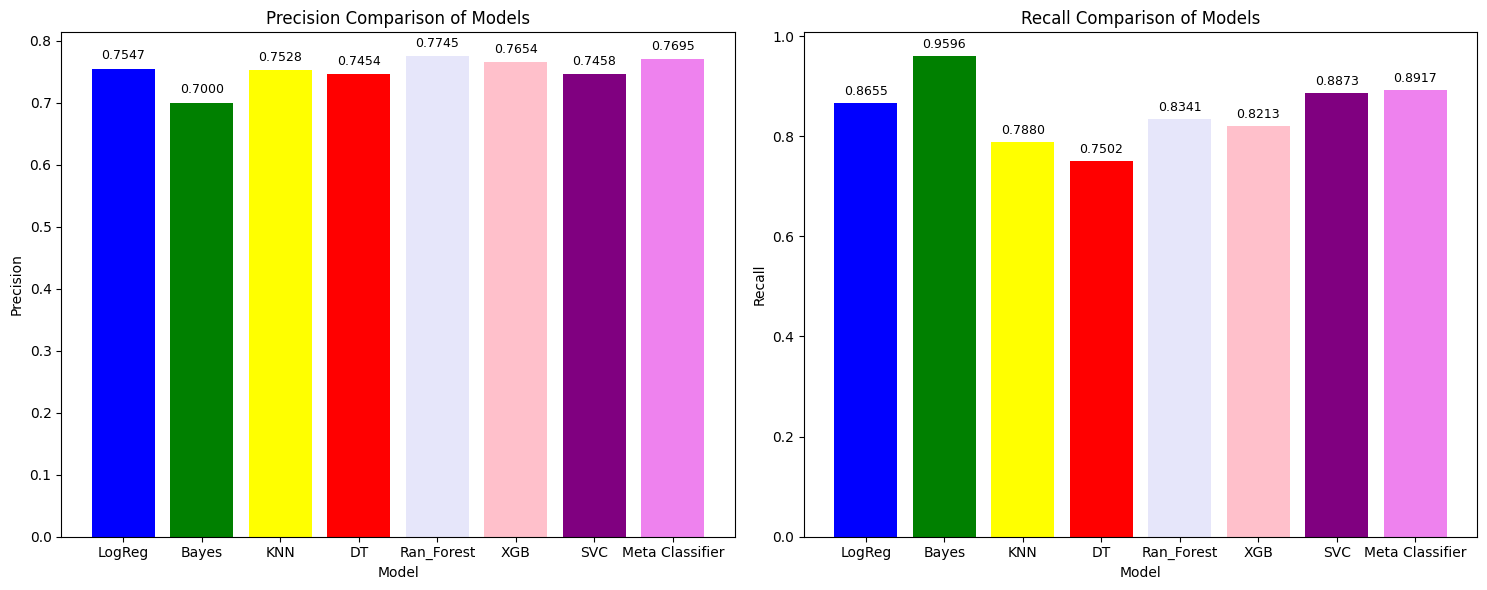

In [ ]:
# Calculate precision and recall for each model
precisions = [precision_score(Y_test,X_test_prediction_log_reg), precision_score(Y_test, X_test_prediction_nbayes),  precision_score(Y_test, X_test_prediction_knn),precision_score(Y_test, X_test_prediction_dt_classifier),precision_score(Y_test,X_test_prediction_random_forest),precision_score(Y_test,X_test_prediction_xgb),precision_score(Y_test,X_test_prediction_svc),precision_score(Y_test,y_pred_meta)]
recalls = [recall_score(Y_test, X_test_prediction_log_reg), recall_score(Y_test, X_test_prediction_nbayes),  recall_score(Y_test, X_test_prediction_knn),recall_score(Y_test, X_test_prediction_dt_classifier),recall_score(Y_test,X_test_prediction_random_forest),recall_score(Y_test,X_test_prediction_xgb),recall_score(Y_test,X_test_prediction_svc),recall_score(Y_test,y_pred_meta)]

# Define models
models = ["LogReg", "Bayes", "KNN","DT","Ran_Forest","XGB","SVC","Meta Classifier"]

# Plot the bar chart for precision
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(models, precisions, color=["blue", "green", "yellow","red","lavender","pink","purple","violet"])
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision Comparison of Models')
for i, f1 in enumerate(precisions):
    plt.text(i, f1 + 0.01, f"{f1:.4f}", ha="center", va="bottom", fontsize=9)


# Plot the bar chart for recall
plt.subplot(1, 2, 2)
plt.bar(models, recalls, color=["blue", "green", "yellow","red","lavender","pink","purple","violet"])
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall Comparison of Models')
for i, f1 in enumerate(recalls):
    plt.text(i, f1 + 0.01, f"{f1:.4f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()




# **Confusin Matrix**

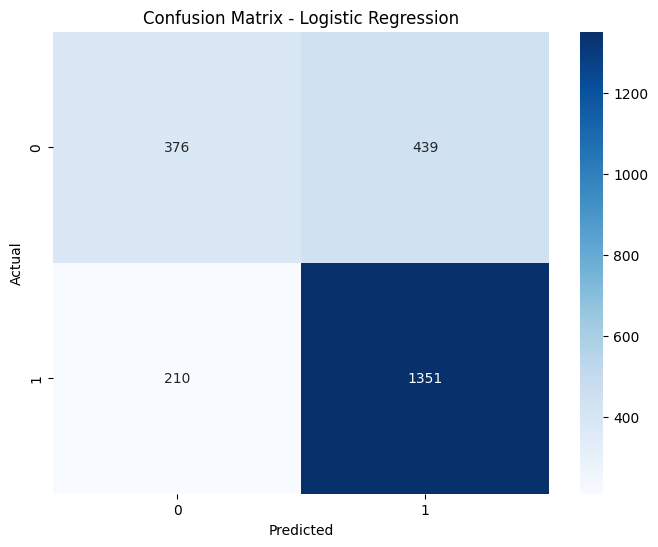

In [ ]:
cm_lr = confusion_matrix(Y_test, X_test_prediction_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

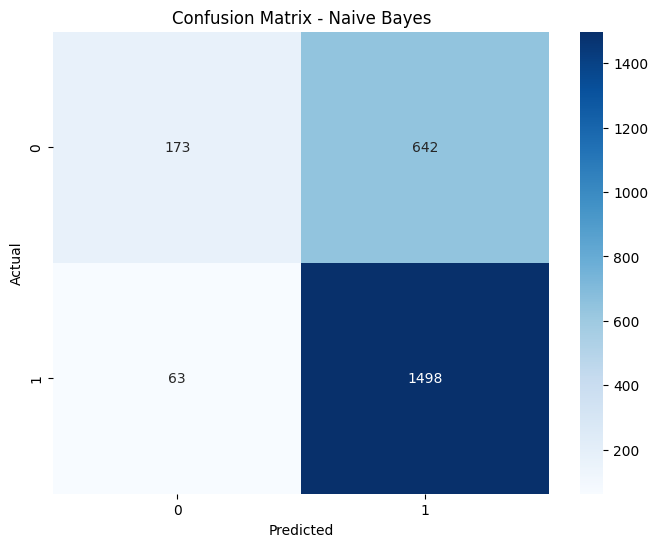

In [ ]:
cm_nb = confusion_matrix(Y_test,X_test_prediction_nbayes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

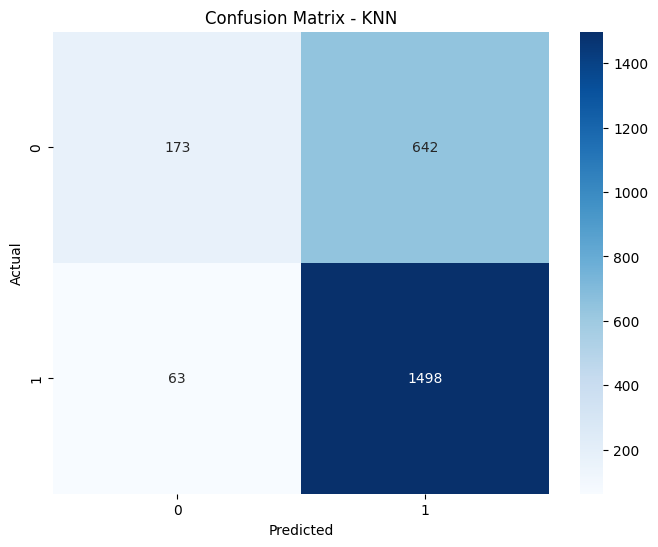

In [ ]:
cm_knn = confusion_matrix(Y_test,X_test_prediction_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

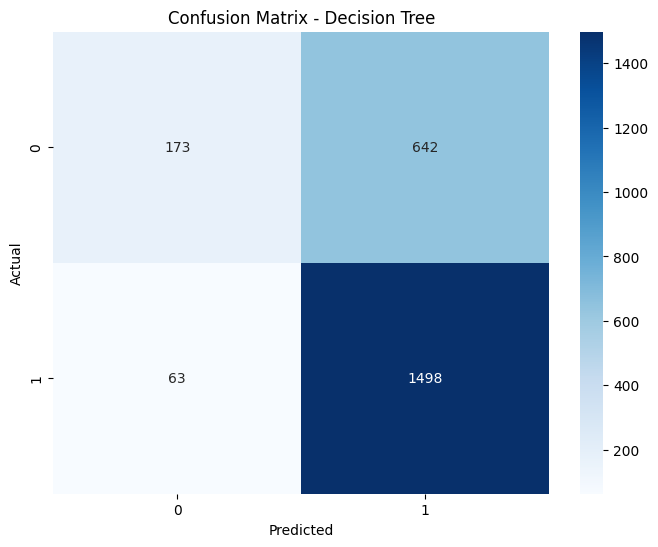

In [ ]:
cm_dt_classifier = confusion_matrix(Y_test,X_test_prediction_dt_classifier)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

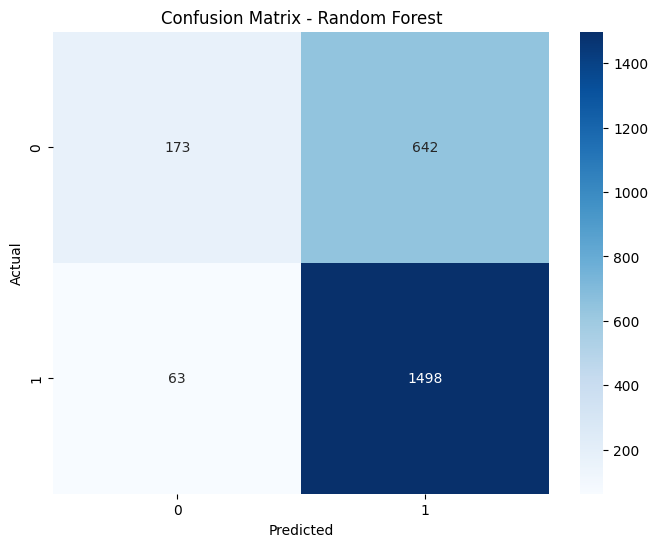

In [ ]:
cm_dt_classifier = confusion_matrix(Y_test,X_test_prediction_random_forest)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

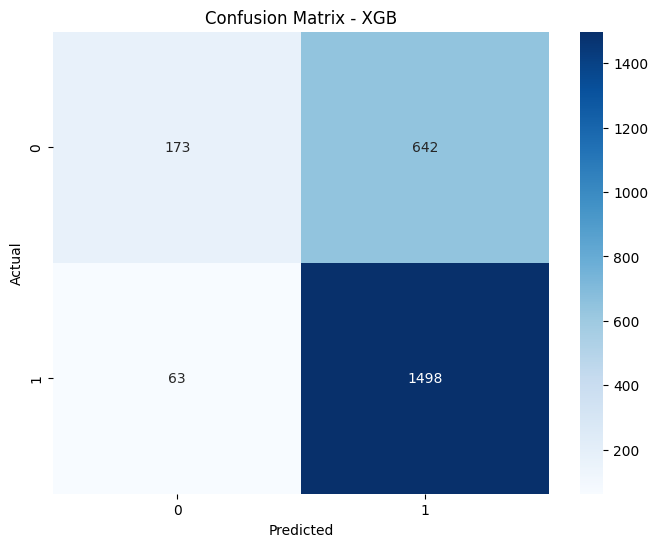

In [ ]:
cm_dt_classifier = confusion_matrix(Y_test,X_test_prediction_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - XGB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

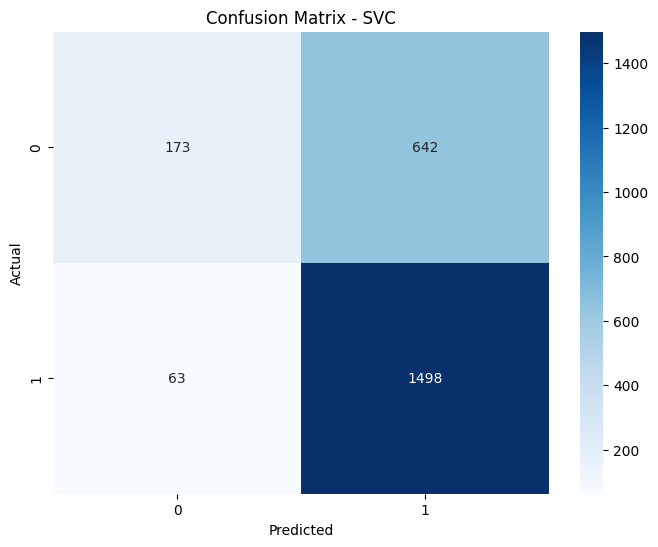

In [ ]:
cm_dt_classifier = confusion_matrix(Y_test,X_test_prediction_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

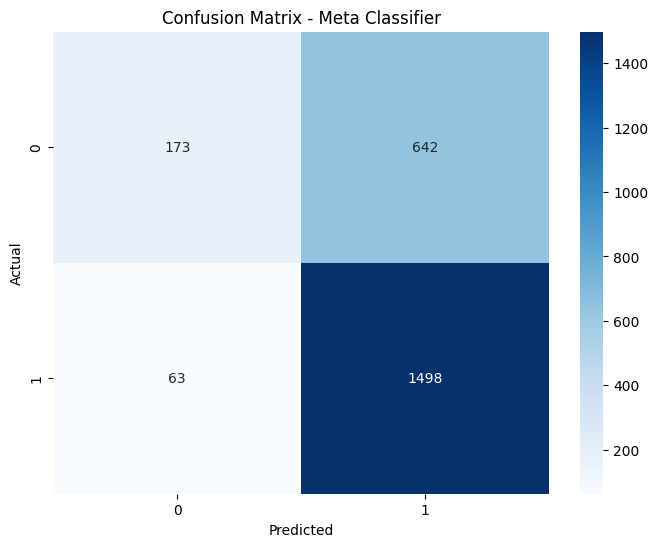

In [ ]:
cm_dt_classifier = confusion_matrix(target, y_pred_meta)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Meta Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## *ROC vs AUC**

# **RandomForest**

AUC Score: 0.8806


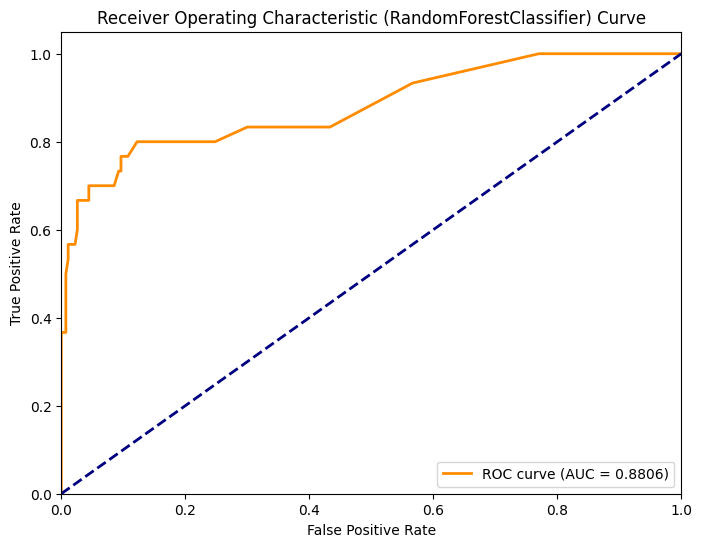

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier


# 1. Create a sample imbalanced dataset (use your dataset here)
X, Y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RandomForestClassifier) Curve')
plt.legend(loc="lower right")
plt.show()


# **KNN**

AUC Score: 0.7247


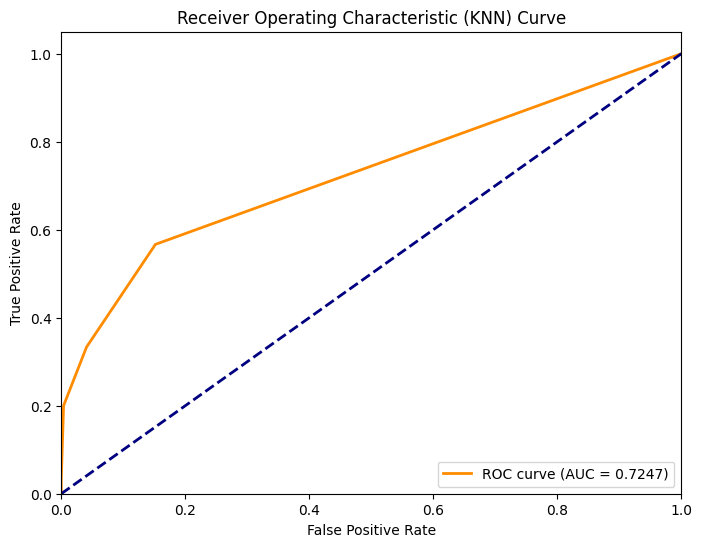

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB

# 1. Create a sample imbalanced dataset (use your dataset here)
X, Y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = KNeighborsClassifier() # Assign the existing GaussianNB instance to model.
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (KNN) Curve')
plt.legend(loc="lower right")
plt.show()


# **Naive Bayes**

AUC Score: 0.8814


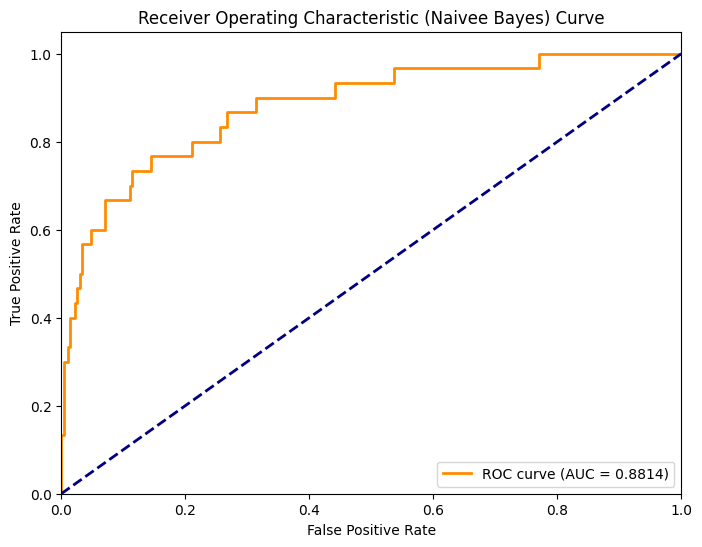

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier

# 1. Create a sample imbalanced dataset (use your dataset here)
X, Y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = nbayes # Assign the existing GaussianNB instance to model.
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Naivee Bayes) Curve')
plt.legend(loc="lower right")
plt.show()


# **XGB**

AUC Score: 0.8827


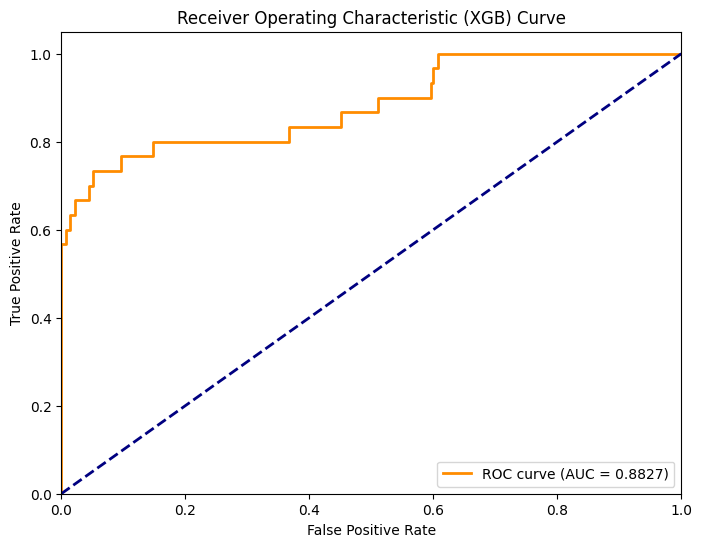

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from xgboost import XGBClassifier

# 1. Create a sample imbalanced dataset (use your dataset here)
X, Y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = XGBClassifier() # Assign the existing GaussianNB instance to model.
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (XGB) Curve')
plt.legend(loc="lower right")
plt.show()


# **DT classifier**

AUC Score: 0.7741


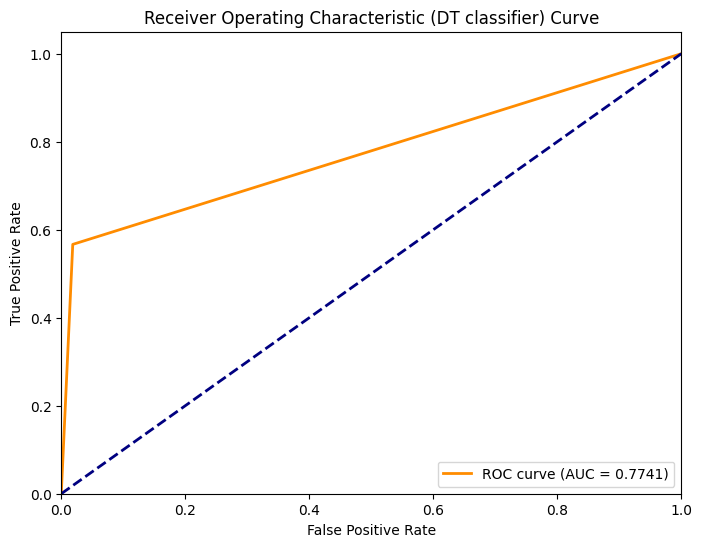

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier

# 1. Create a sample imbalanced dataset (use your dataset here)
X, Y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = DecisionTreeClassifier() # Assign the existing GaussianNB instance to model.
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (DT classifier) Curve')
plt.legend(loc="lower right")
plt.show()


# **Logistic Regression**

AUC Score: 0.8728


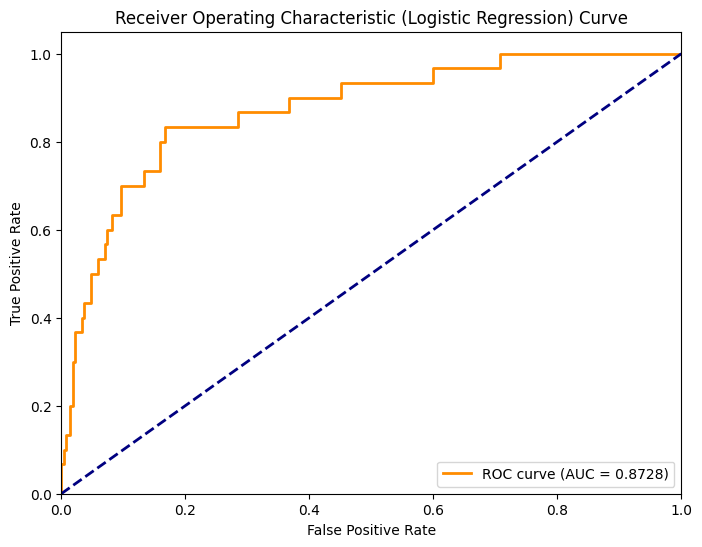

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

# 1. Create a sample imbalanced dataset (use your dataset here)
X, Y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = LogisticRegression() # Assign the existing GaussianNB instance to model.
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression) Curve')
plt.legend(loc="lower right")
plt.show()


# **SVC**

AUC Score: 0.8731


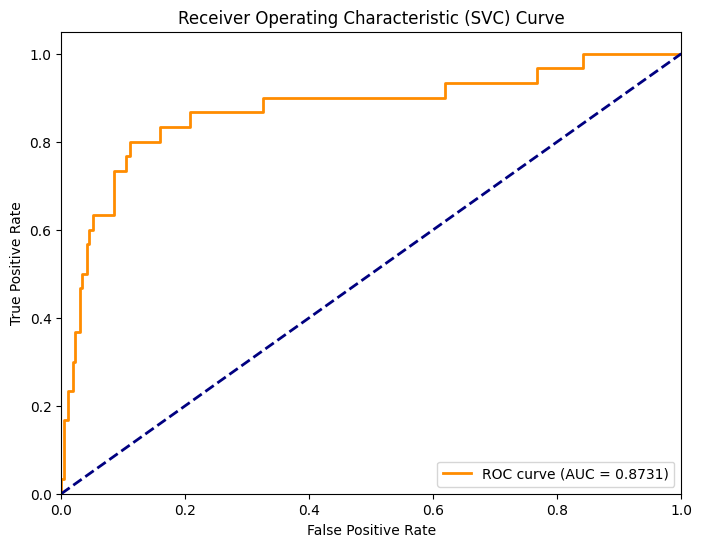

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.svm import SVC

# 1. Create a sample imbalanced dataset (use your dataset here)
X, Y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = SVC(probability=True) # Assign the existing GaussianNB instance to model and enable probability estimation.
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVC) Curve')
plt.legend(loc="lower right")
plt.show()

# meta classifier

AUC Score: 0.9185


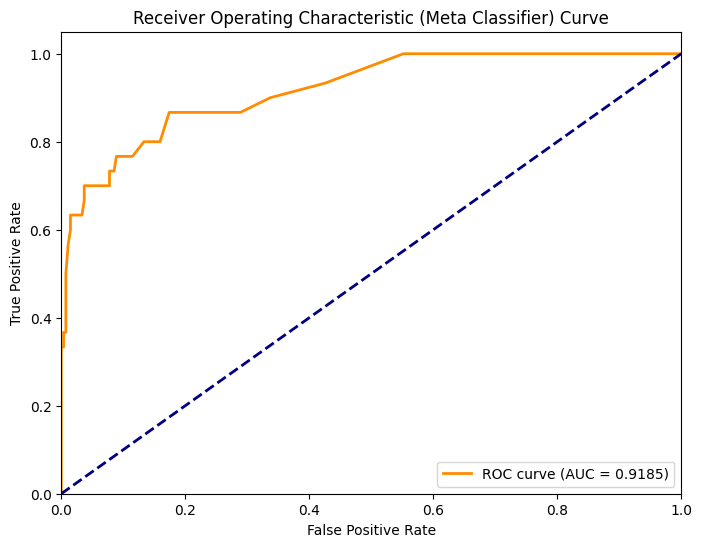

In [ ]:

# 1. Create a sample imbalanced dataset (use your dataset here)
X, Y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = meta_classifier
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Meta Classifier) Curve')
plt.legend(loc="lower right")
plt.show()
